# OpenCV 

Az OpenCV egy a számítógépes látás és képfeldolgozás területén elterjedt és népszerű könyvtárcsomag. C/C++ nyelven íródott, de több különféle programozási környezetben is elérhető, többek között Python alatt is.

Az OpenCV használatához telepíteni kell az OpenCV, NumPy és Matplotlib csomagokat.

A csomag használatához importálni kell a csomagot.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Olvasás, módosítás, megjelenítés, írás

In [2]:
img = cv2.imread("coffee.jpg")

In [3]:
cv2.imshow("Coffee", img) # Megjeleníti a képet egy új ablakban.
cv2.waitKey(0) # Vár egy billentyűleütésre.
cv2.destroyAllWindows() # Bezárja az ablakot.

Az OpenCV használatához azért szükséges a Numpy, mert a képeket Numpy tömb formájában tárolja. Ezt jól szemléltetik a következők is.

In [4]:
img # A kimeneten látható, hogy egy 3 dimenziós Numpy tömbben tárolja a képet.

array([[[ 75, 171, 224],
        [ 69, 158, 209],
        [ 29, 105, 154],
        ...,
        [ 14,  24,  42],
        [ 12,  23,  43],
        [ 12,  23,  43]],

       [[ 68, 162, 215],
        [ 58, 147, 198],
        [ 17,  90, 140],
        ...,
        [ 14,  24,  42],
        [ 12,  23,  43],
        [ 12,  23,  43]],

       [[ 66, 158, 211],
        [ 55, 139, 191],
        [  8,  79, 129],
        ...,
        [ 14,  23,  43],
        [ 12,  23,  43],
        [ 12,  23,  43]],

       ...,

       [[  3,  17,  45],
        [  7,  21,  49],
        [ 19,  33,  61],
        ...,
        [  0,   7,  21],
        [  0,   3,  19],
        [  1,  14,  30]],

       [[ 17,  32,  58],
        [ 19,  34,  60],
        [ 15,  30,  56],
        ...,
        [ 13,  24,  38],
        [ 20,  33,  49],
        [ 29,  43,  61]],

       [[ 17,  32,  58],
        [ 16,  31,  57],
        [  2,  17,  43],
        ...,
        [  0,  11,  25],
        [ 17,  30,  46],
        [ 26,  40,  58]]

A dimenziók mérete megadja a kép magasságát (184), szélességét (274), illetve a színcsatornák számát (3). Ez utóbbi jelen esetben 3, hiszen RGB térben vannak a leképezve a színek.

In [5]:
img.shape

(184, 274, 3)

In [6]:
print("A vizsgált kép ", img.shape[0], " képpont magas és ",
      img.shape[1], " képpont széles. A színcsatornák száma ", img.shape[2], ".", sep="")

A vizsgált kép 184 képpont magas és 274 képpont széles. A színcsatornák száma 3.


Mivel a kép egy Numpy tömb, a megszokott módon tudjuk tömbként kezelni. Például módosíthatjuk az egyes képpontok értékeit.

In [7]:
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        img[i, j, 2] = 0 # Minden képpont esetén az utolsó színkomponens (vörös) értékét nullára állítja.

In [8]:
cv2.imshow("Coffee", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

A képet a következő módon menthetjük a kívánt formátumban.

In [9]:
cv2.imwrite("out0.png", img)
cv2.imwrite("out0.jpg", img)
cv2.imwrite("out0.bmp", img)

True

# Színcsatornák (konvertálás, komponensekre bontás)

A bemeneti RGB képet szürkeárnyalatos képpé konvertáljuk.

In [10]:
img = cv2.imread("coffee.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
cv2.imshow("gray", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Látható, hogy a kép színcsatornáinak száma háromról egyre változott a konvertálás következtében.

In [12]:
img.shape

(184, 274, 3)

In [13]:
img_gray.shape

(184, 274)

Lehetőség van színcsatornákra bontani a képet.

In [14]:
b, g, r = cv2.split(img)

De az eddigiek alapján tudjuk, hogy ez például így is működik:

In [15]:
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

A három színcsatorna intenzitásának megjelenítése szürkeárnyalatos képként.

In [16]:
cv2.imshow("rgb", img)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)
cv2.waitKey(0)
cv2.destroyAllWindows()

Az értékek megjelenítése az RGB térben:

In [17]:
zeros = np.zeros(img.shape[:2], dtype="uint8")

cv2.imshow("rgb", img)
cv2.imshow("b", cv2.merge([b, zeros, zeros]))
cv2.imshow("g", cv2.merge([zeros, g, zeros]))
cv2.imshow("r", cv2.merge([zeros, zeros, r]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Hisztogram

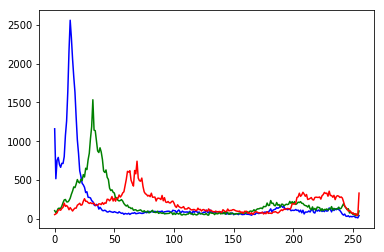

In [18]:
histogram2 = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(histogram2, color="b")
histogram2 = cv2.calcHist([img], [1], None, [256], [0, 256])
plt.plot(histogram2, color="g")
histogram2 = cv2.calcHist([img], [2], None, [256], [0, 256])
plt.plot(histogram2, color="r")
plt.show()

# Élkiemelés

In [19]:
kernel0 = np.array([[-1,-2,-1], 
                    [0,0,-0], 
                    [1,2,1]])

filtered_img0 = cv2.filter2D(img, -1, kernel0)

kernel1 = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]])

filtered_img1 = cv2.filter2D(img, -1, kernel1)

#filtered_img_sum = (filtered_img0 + filtered_img1)
filtered_img_sum = cv2.add(filtered_img0, filtered_img1)

In [20]:
cv2.imshow("filtered_img0", filtered_img0)
cv2.imshow("filtered_img1", filtered_img1)
cv2.imshow("filtered_img_sum", filtered_img_sum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
filtered_img_sum_gray = cv2.cvtColor(filtered_img_sum, cv2.COLOR_BGR2GRAY)

cv2.imshow("filtered_img_sum_gray", filtered_img_sum_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Élesítés

In [22]:
kernel = np.array([[-1,-1,-1], 
                    [-1,9,-1], 
                    [-1,-1,-1]])

filtered_img2 = cv2.filter2D(img, -1, kernel)

cv2.imshow("img", img)
cv2.imshow("filtered_img2", filtered_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Küszöbölés

In [23]:
# Megnyitás szürkeárnyalati konverzióval
img = cv2.imread("coffee.jpg", 0)
cv2.imshow("Img", img)

# Aminek az intenzitása 127 alatti, az 0 intezitást vesz fel, minden más intenzitása 255 lesz.
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh1)

# Az előző inverze.
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inverse", thresh2)

# Ahol az intenzitás 127 feletti, ott 127 lesz az új intenzitás.
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow("THRESH TRUNC", thresh3)

# Ahol az intenzitás 127 alatti, ott 0 lesz az új intenzitás.
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow("THRESH TOZERO", thresh4)

# Az előző inverze.
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow("THRESH TOZERO INV", thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

# Morfológiai operátorok (Erózió, dilatáció, nyitás és zárás)

In [24]:
image = cv2.imread('abc.png', 0)

cv2.imshow('Original', image)
cv2.waitKey(0)

# Morfológiai szűrő
kernel = np.ones((5,5), np.uint8)

# Erózió
erosion = cv2.erode(image, kernel, iterations = 1)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)

# Dilatáció
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2.imshow('Dilation', dilation)
cv2.waitKey(0)

# Nyitás
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opening', opening)
cv2.waitKey(0)

# Zárás
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closing', closing)
cv2.waitKey(0)


cv2.destroyAllWindows()

# Képek összeadása és kivonása

In [25]:
img = cv2.imread('coffee.jpg')

# Az M mátrix mérete megegyezik a bemeneti kép méretével. Minden intenzitása 175. Végeredményben M is egy képnek tekinthető.
M = np.ones(img.shape, dtype = "uint8") * 175 

# M mátrix és a kép összege.
added = cv2.add(img, M)
cv2.imshow("Added", added)

# M mátrix és a kép különbsége.
subtracted = cv2.subtract(img, M)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()